In [3]:
import torch
import matplotlib.pyplot as plt
from transformers import RobertaTokenizer
from transformers import RobertaForSequenceClassification
from transformers import RobertaModel

/Applications/anaconda3/envs/BERT-test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
tokenizer_path = "./tokenizer_roberta"
model_path = "./model_roberta"

tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
model = RobertaForSequenceClassification.from_pretrained(model_path, output_hidden_states=True, output_attentions=True)

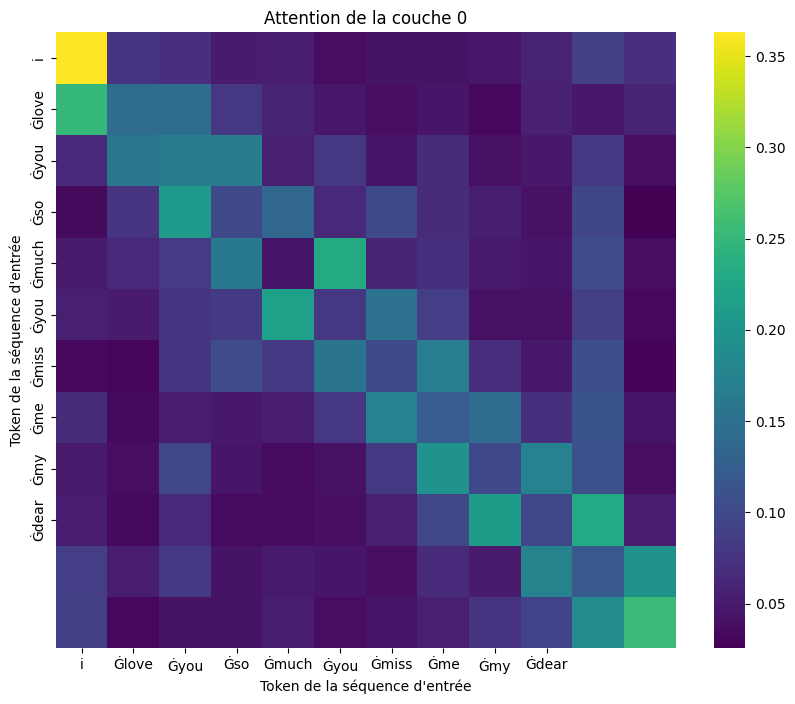

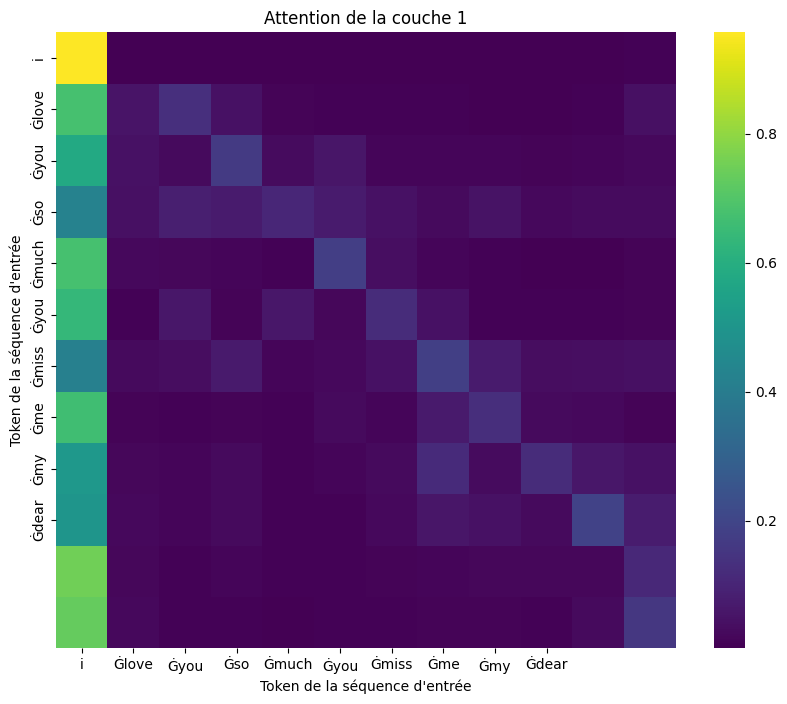

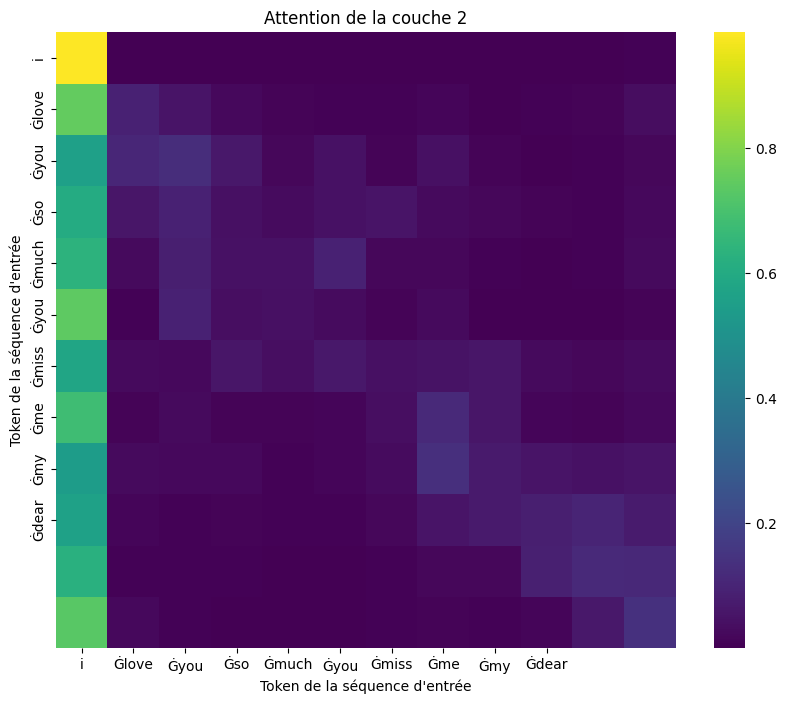

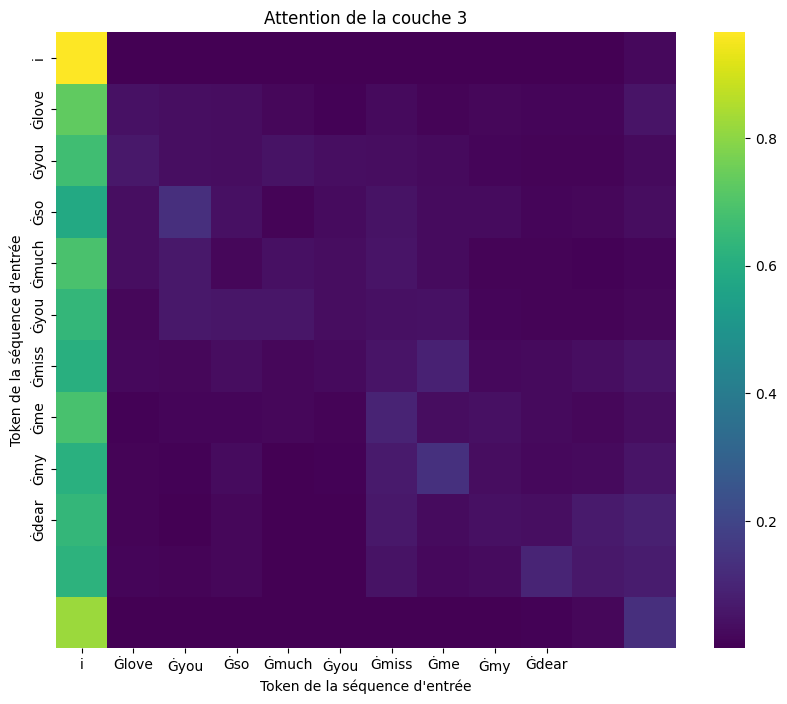

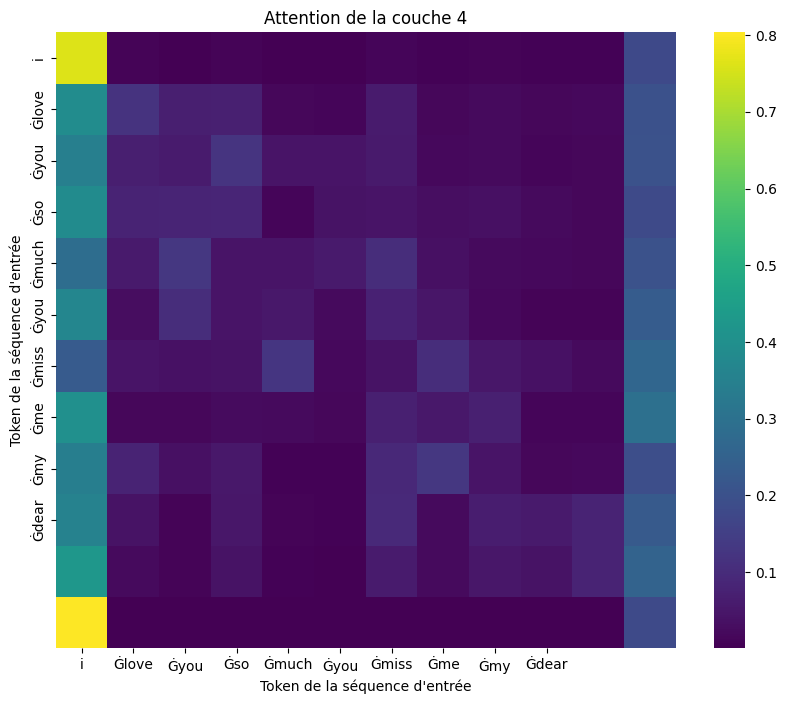

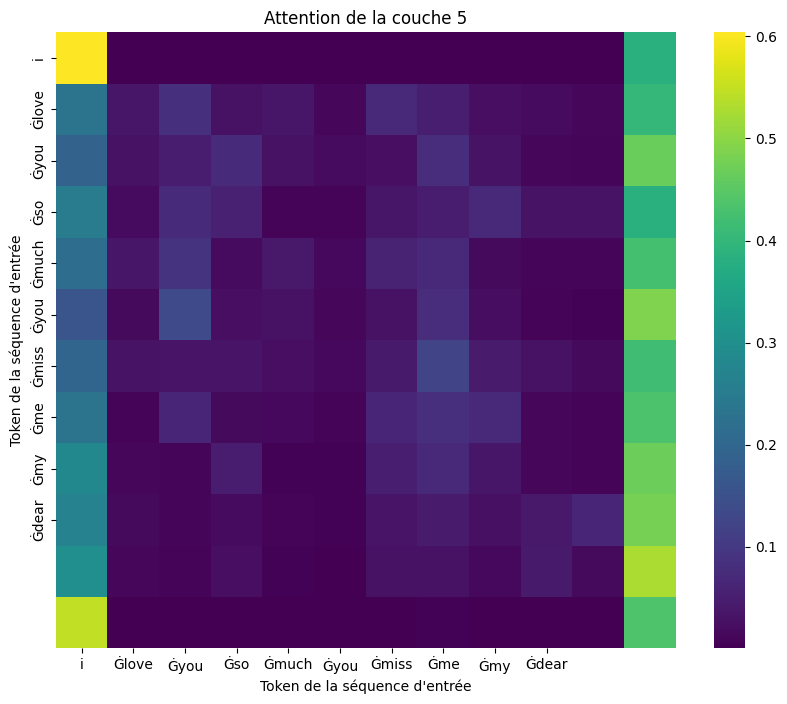

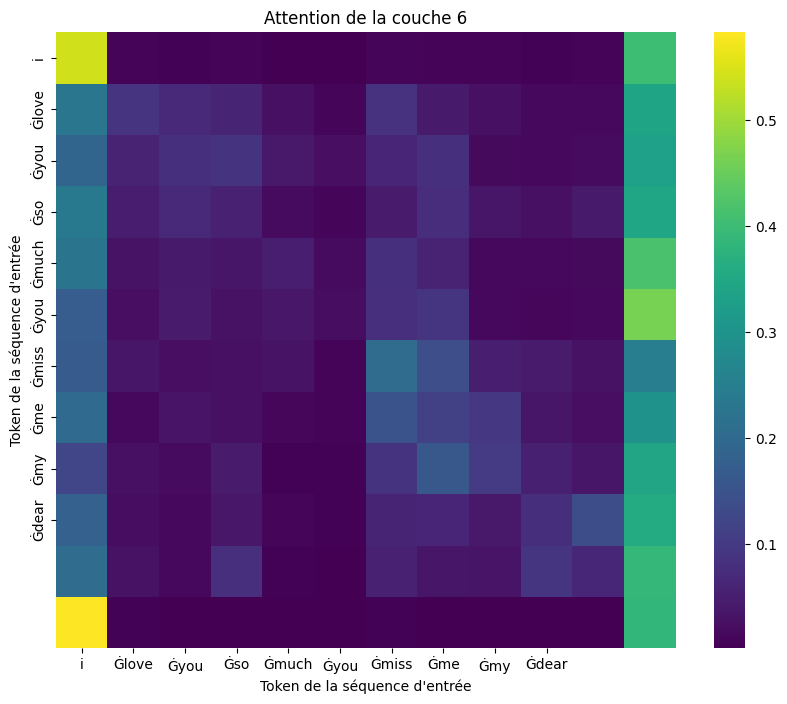

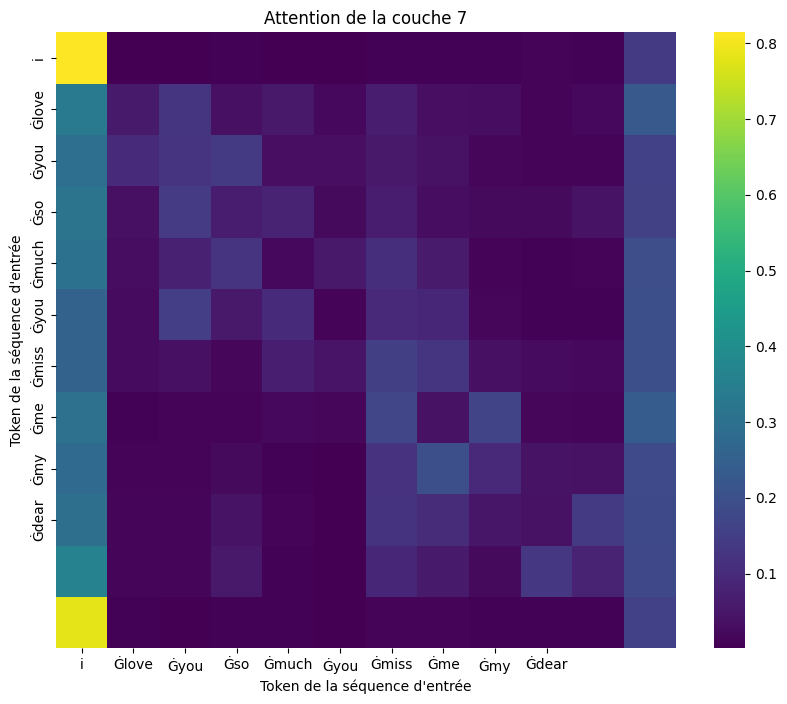

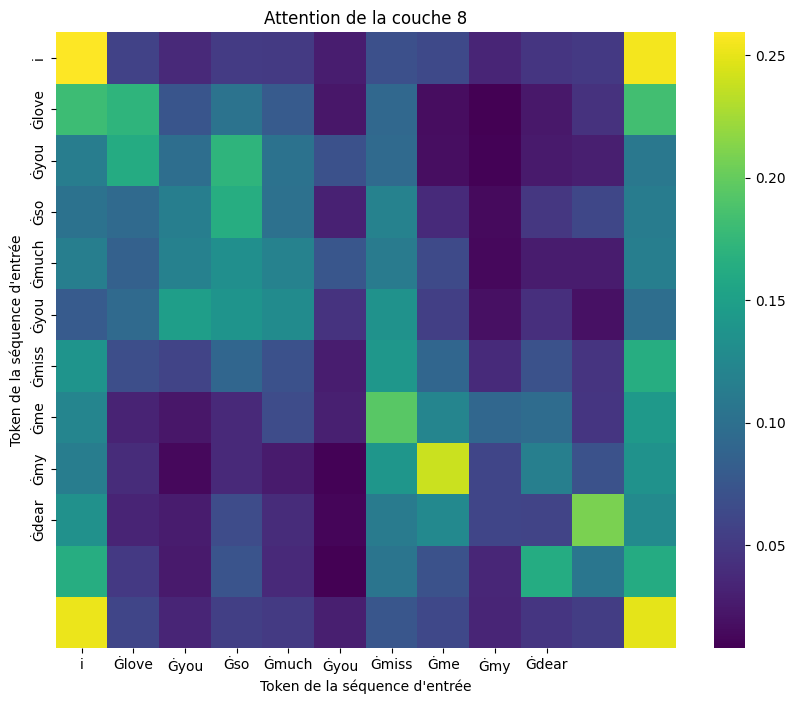

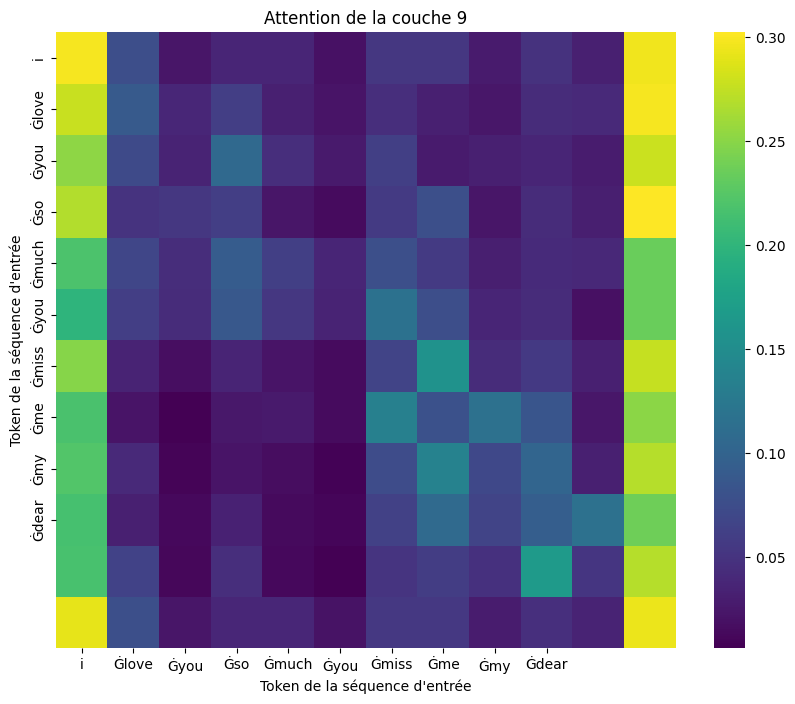

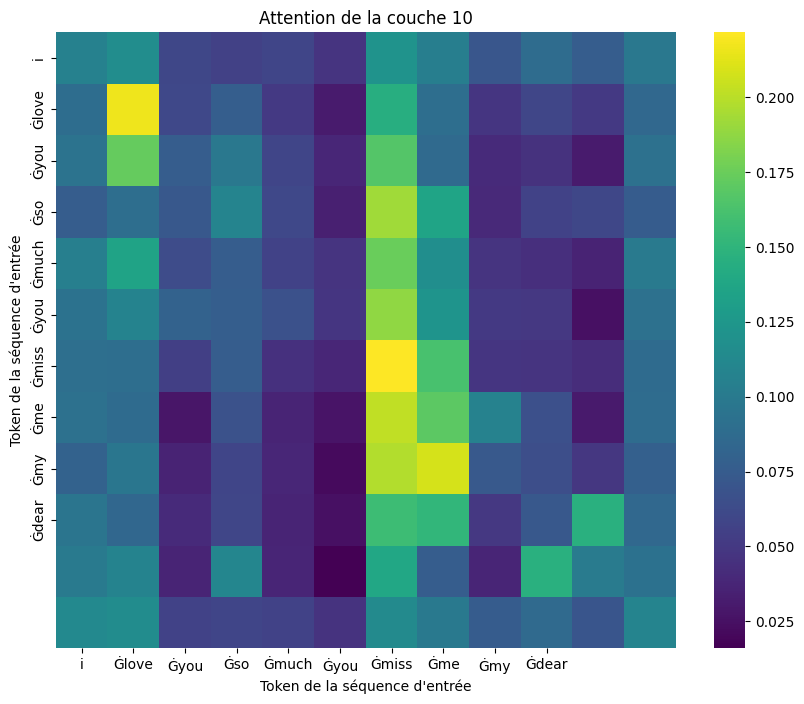

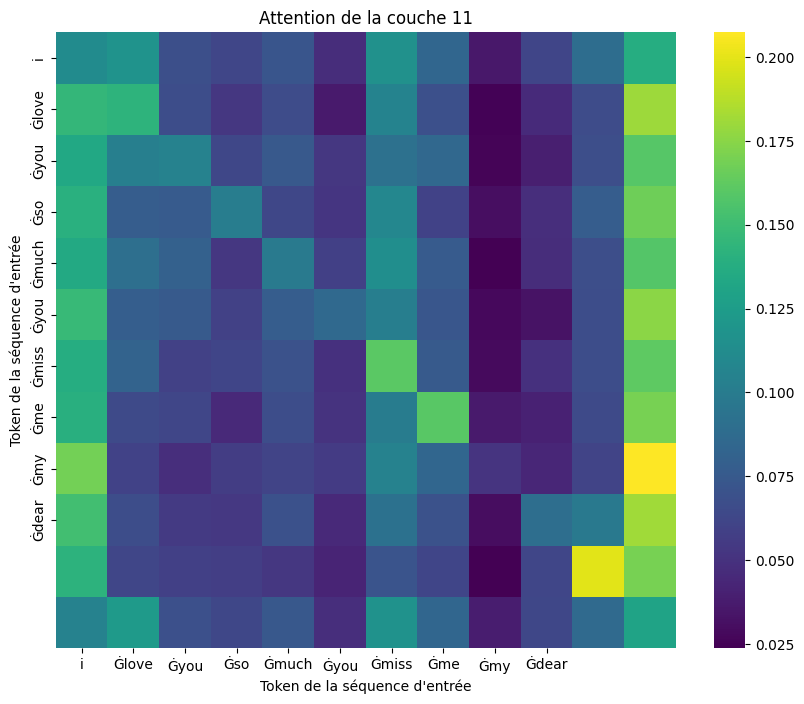

In [23]:
import seaborn as sns
import numpy as np

sentence = "i love you so much you miss me my dear"

tokens = tokenizer.tokenize(sentence)

# Tokenisation de la phrase
inputs = tokenizer(sentence, return_tensors="pt")

# Passage de la phrase à travers le modèle pour obtenir les attentions
with torch.no_grad():
    outputs = model(**inputs)

# Extraction des matrices d'attention
attentions = outputs.attentions

# Moyennisation des matrices d'attention sur la dimension des têtes d'attention
average_attentions = [torch.mean(layer_attention, axis=1).squeeze().numpy() for layer_attention in attentions]

# Visualisation des matrices d'attention moyennes pour chaque couche cachée
for layer, attention in enumerate(average_attentions):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    plt.title(f'Attention de la couche {layer}')
    plt.xlabel('Token de la séquence d\'entrée')
    plt.ylabel('Token de la séquence d\'entrée')
    plt.show()



In [20]:
for layer, attention in enumerate(attentions):
    print(f"Dimensions de l'attention pour la couche {layer}: {attention.shape}")

Dimensions de l'attention pour la couche 0: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 1: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 2: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 3: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 4: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 5: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 6: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 7: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 8: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 9: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 10: torch.Size([1, 12, 14, 14])
Dimensions de l'attention pour la couche 11: torch.Size([1, 12, 14, 14])


In [11]:
sentence = "Votre phrase d'exemple ici."

# Tokenisation de la phrase
inputs = tokenizer(sentence, return_tensors="pt")

# Passage de la phrase à travers le modèle pour obtenir les caractéristiques
with torch.no_grad():
    outputs = model(**inputs)

# Extraction des caractéristiques
hidden_states = outputs.hidden_states

# Affichage des caractéristiques
print("Nombre de couches cachées :", len(hidden_states))
print("Forme des caractéristiques de la première couche cachée :", hidden_states[0].shape)

Nombre de couches cachées : 13
Forme des caractéristiques de la première couche cachée : torch.Size([1, 14, 768])


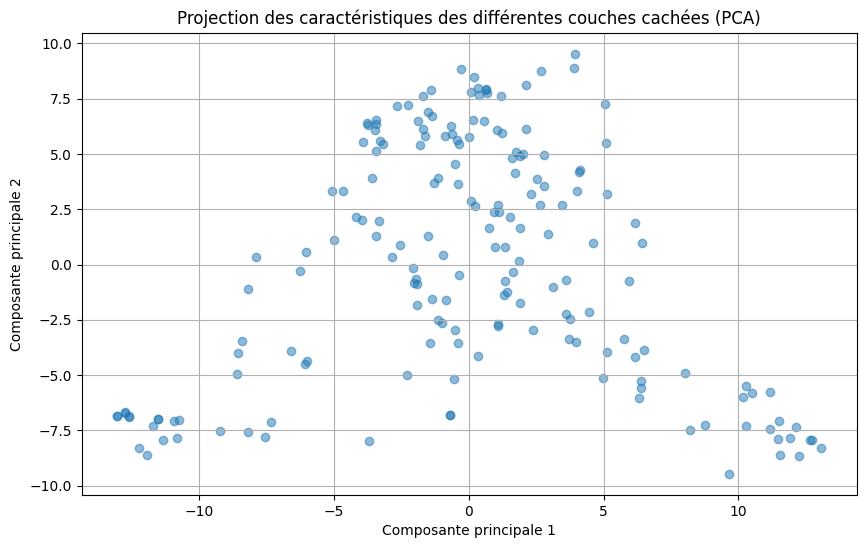

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Concaténer les caractéristiques de toutes les couches cachées
all_hidden_states = torch.cat(hidden_states, dim=1)

# Réduire la dimensionnalité à 2 pour la visualisation
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_hidden_states[0].numpy())

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title('Projection des caractéristiques des différentes couches cachées (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.show()

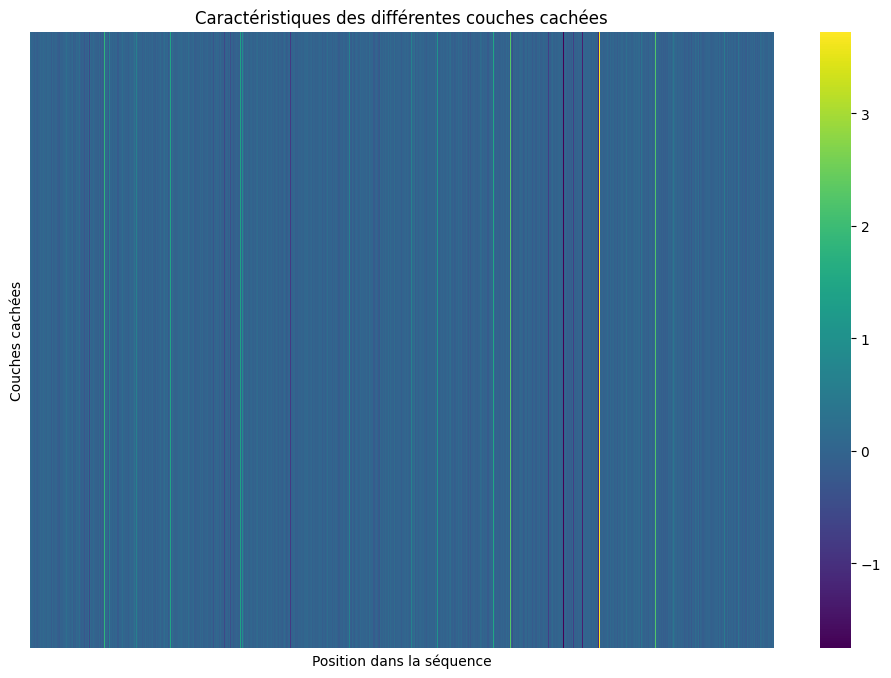

In [13]:
import seaborn as sns

# Transposer les caractéristiques pour avoir les couches cachées sur l'axe des colonnes
hidden_states_transposed = all_hidden_states.transpose(0, 1).numpy()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(hidden_states_transposed[0], cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Caractéristiques des différentes couches cachées')
plt.xlabel('Position dans la séquence')
plt.ylabel('Couches cachées')
plt.show()


In [14]:
model(**inputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1692,  0.1419]], grad_fn=<AddmmBackward0>), hidden_states=(tensor([[[ 0.1692, -0.0561, -0.0023,  ..., -0.0812,  0.0787,  0.0098],
         [-0.0268, -0.0042,  0.7080,  ...,  0.0203, -0.2973,  0.6529],
         [ 0.1131, -0.0783,  0.2934,  ..., -0.4474, -0.7728,  0.1914],
         ...,
         [ 0.7280,  0.0589,  0.0264,  ..., -0.1882, -0.1269,  0.0297],
         [ 0.4423,  0.0687, -0.0188,  ..., -0.7522,  0.0399,  0.0542],
         [ 0.2035, -0.0810, -0.0845,  ...,  0.5204,  0.0836, -0.1688]]],
       grad_fn=<NativeLayerNormBackward0>), tensor([[[ 0.0066, -0.0245, -0.0252,  ..., -0.0311,  0.0289, -0.1565],
         [ 0.2375, -0.0921,  1.1428,  ...,  0.2820, -0.1015,  1.0733],
         [-0.1810, -0.0591,  0.5156,  ..., -0.4752, -1.0775,  0.6386],
         ...,
         [ 0.7895, -0.1559,  0.1661,  ..., -0.0877,  0.0096, -0.0539],
         [ 0.4046,  0.0402,  0.1344,  ..., -0.2396,  0.2269, -0.0748],
         [-0.3430, -0.0943,  0.

In [3]:
# Import des modules nécessaires
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Chemin vers le tokenizer et le modèle
tokenizer_path = "./tokenizer_roberta"
model_path = "./model_roberta"

# Chargement du tokenizer et du modèle
tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Visualisation des poids des différentes couches
for name, param in model.named_parameters():
    print(name, param.size())


roberta.embeddings.word_embeddings.weight torch.Size([50265, 768])
roberta.embeddings.position_embeddings.weight torch.Size([514, 768])
roberta.embeddings.token_type_embeddings.weight torch.Size([1, 768])
roberta.embeddings.LayerNorm.weight torch.Size([768])
roberta.embeddings.LayerNorm.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.query.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.query.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.key.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.key.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.value.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.value.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.dense.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.output.dense.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.LayerNorm.weight torch.Size([768])
roberta.encoder.layer.0.attention.output.

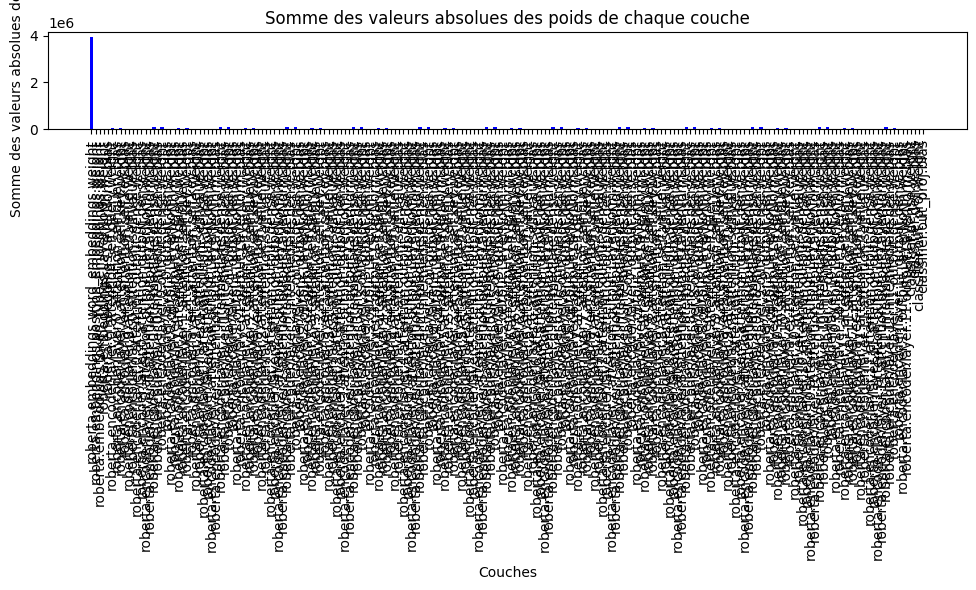

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Liste pour stocker les sommes des valeurs absolues des poids de chaque couche
weights_sums = []

# Calcul des sommes des valeurs absolues des poids pour chaque couche
for param in model.parameters():
    weights_sums.append(param.abs().sum().item())

# Affichage des poids de chaque couche sur un graphique
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(weights_sums)), weights_sums, color='blue')
plt.title('Somme des valeurs absolues des poids de chaque couche')
plt.xlabel('Couches')
plt.ylabel('Somme des valeurs absolues des poids')
plt.xticks(np.arange(len(weights_sums)), [name for name, _ in model.named_parameters()], rotation=90)
plt.tight_layout()
plt.show()

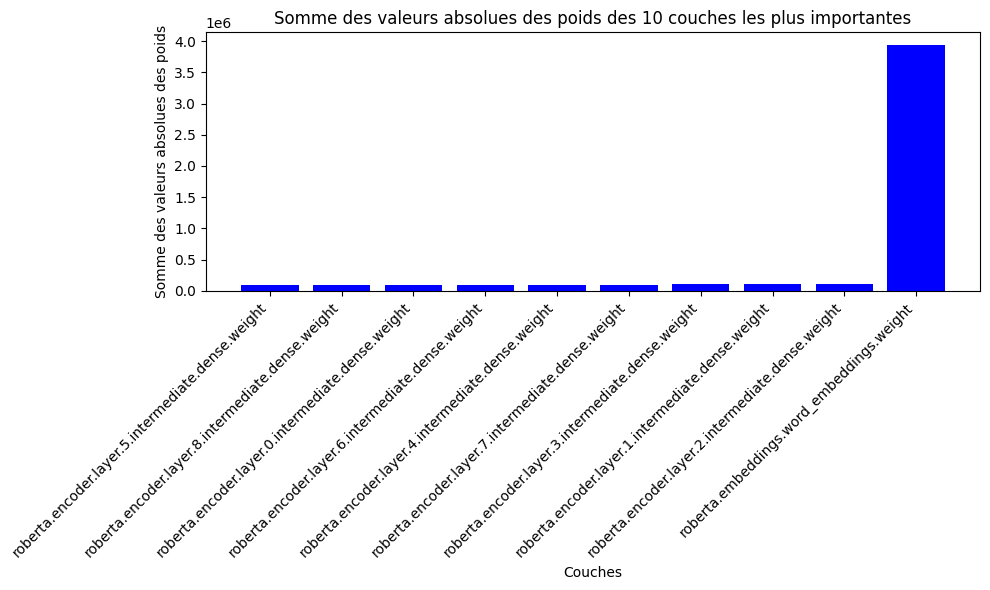

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Liste pour stocker les sommes des valeurs absolues des poids de chaque couche
weights_sums = []

# Calcul des sommes des valeurs absolues des poids pour chaque couche
for param in model.parameters():
    weights_sums.append(param.abs().sum().item())

# Sélection des indices des couches avec les sommes de poids les plus élevées (par exemple, les 10 plus élevées)
top_k_indices = np.argsort(weights_sums)[-10:]  # Sélection des 10 couches avec les sommes de poids les plus élevées

# Affichage des poids de chaque couche sur un graphique
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(top_k_indices)), [weights_sums[i] for i in top_k_indices], color='blue')
plt.title('Somme des valeurs absolues des poids des 10 couches les plus importantes')
plt.xlabel('Couches')
plt.ylabel('Somme des valeurs absolues des poids')
plt.xticks(np.arange(len(top_k_indices)), [list(model.named_parameters())[i][0] for i in top_k_indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
layer_weights_sums = []

# Calcul des sommes des valeurs absolues des poids pour chaque couche avec leur nom
for name, param in model.named_parameters():
    layer_weights_sums.append((name, param.abs().sum().item()))

# Sélection des 10 couches avec les sommes de poids les plus élevées
top_k_layers = sorted(layer_weights_sums, key=lambda x: x[1], reverse=True)[:10]

# Affichage de la liste des noms des 10 couches avec le plus de poids
print("Liste des 10 couches avec le plus de poids :")
for layer_name, _ in top_k_layers:
    print(layer_name)

Liste des 10 couches avec le plus de poids :
roberta.embeddings.word_embeddings.weight
roberta.encoder.layer.2.intermediate.dense.weight
roberta.encoder.layer.1.intermediate.dense.weight
roberta.encoder.layer.3.intermediate.dense.weight
roberta.encoder.layer.7.intermediate.dense.weight
roberta.encoder.layer.4.intermediate.dense.weight
roberta.encoder.layer.6.intermediate.dense.weight
roberta.encoder.layer.0.intermediate.dense.weight
roberta.encoder.layer.8.intermediate.dense.weight
roberta.encoder.layer.5.intermediate.dense.weight


In [9]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Chargement du tokenizer et du modèle
tokenizer_path = "./tokenizer_roberta"
model_path = "./model_roberta"

tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
model = RobertaForSequenceClassification.from_pretrained(model_path, output_attentions=True)

# Entrée de test
text = "Hey john how are you today ? you look good"

# Encodage de la phrase
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Forward pass à travers le modèle
outputs = model(**inputs)

# Récupération des poids d'attention de la dernière couche d'attention
attention_weights = outputs.attentions[-1]

# Affichage des poids d'attention
print("Poids d'attention de la dernière couche:")
print(attention_weights)

# Vous pouvez maintenant utiliser ces poids d'attention pour analyser comment le modèle attribue de l'importance aux différents mots dans la phrase.


Poids d'attention de la dernière couche:
tensor([[[[0.1400, 0.0181, 0.0709,  ..., 0.0298, 0.0391, 0.3433],
          [0.2237, 0.0120, 0.0377,  ..., 0.0100, 0.0273, 0.5779],
          [0.2588, 0.0142, 0.0229,  ..., 0.0284, 0.0522, 0.4606],
          ...,
          [0.1610, 0.0192, 0.0404,  ..., 0.0198, 0.0580, 0.3369],
          [0.1796, 0.0197, 0.0334,  ..., 0.0306, 0.0687, 0.3099],
          [0.1370, 0.0170, 0.0714,  ..., 0.0331, 0.0431, 0.2940]],

         [[0.1810, 0.0435, 0.1614,  ..., 0.0473, 0.0665, 0.2025],
          [0.2252, 0.0085, 0.1709,  ..., 0.0120, 0.0055, 0.5051],
          [0.2353, 0.0232, 0.1661,  ..., 0.0207, 0.0128, 0.3589],
          ...,
          [0.2532, 0.0056, 0.0650,  ..., 0.0603, 0.0415, 0.4459],
          [0.2290, 0.0073, 0.1477,  ..., 0.0327, 0.0244, 0.4530],
          [0.1379, 0.0675, 0.1459,  ..., 0.0595, 0.0920, 0.1302]],

         [[0.2827, 0.0045, 0.0179,  ..., 0.0175, 0.0107, 0.4679],
          [0.1570, 0.0438, 0.0851,  ..., 0.0136, 0.0130, 0.3073],
 

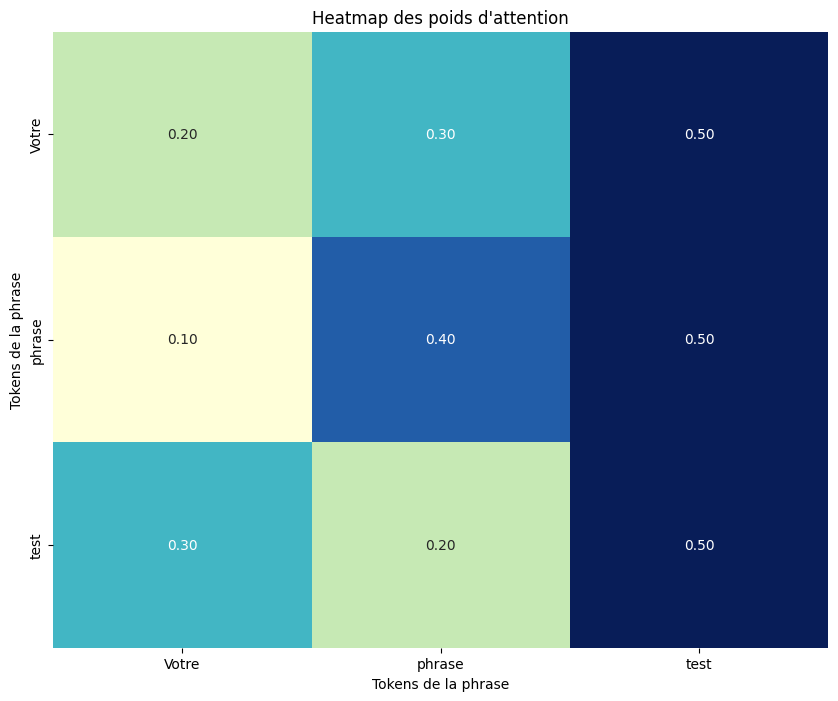

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher une heatmap des poids d'attention
def plot_attention_heatmap(attention_weights, tokens):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap="YlGnBu", annot=True, fmt=".2f", cbar=False)
    plt.xlabel("Tokens de la phrase")
    plt.ylabel("Tokens de la phrase")
    plt.title("Heatmap des poids d'attention")
    plt.show()

# Attention_weights est une matrice de taille (num_tokens, num_tokens) représentant les poids d'attention entre chaque paire de mots dans la phrase
# Tokens est une liste contenant les tokens de la phrase

# Exemple d'utilisation avec des données fictives
attention_weights = [
    [0.2, 0.3, 0.5],
    [0.1, 0.4, 0.5],
    [0.3, 0.2, 0.5]
]
tokens = ["Votre", "phrase", "test"]

plot_attention_heatmap(attention_weights, tokens)

In [18]:
import torch
from captum.attr import LayerIntegratedGradients, TokenReferenceBase, visualization

# Exemple d'interprétation avec Layer Integrated Gradients
def interpret_sentence(model, tokenizer, sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Créer une référence de tokens pour l'interprétation
    token_reference = TokenReferenceBase(reference_token_idx=tokenizer.pad_token_id)

    # Prédiction du modèle
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1)

    # Créer une instance de LayerIntegratedGradients
    lig = LayerIntegratedGradients(model, model.roberta.embeddings)

    # Calculer les attributions d'attention
    attributions = lig.attribute(inputs["input_ids"], baselines=torch.zeros_like(input_ids), target=predicted_class, additional_forward_args=(attention_mask,))

    # Visualiser les attributions
    visualization.visualize_text([attributions.sum(dim=2).squeeze().tolist()], sentence, vis_method="color")

# Exemple d'utilisation
sentence = "Hey john how are you today ? you look good"
interpret_sentence(model, tokenizer, sentence)

AttributeError: 'SequenceClassifierOutput' object has no attribute 'shape'

In [3]:
import pandas as pd

data = pd.read_csv('../Data/tweets.csv', encoding='latin-1', header=None)
data = data.rename(columns={data.columns[0]: 'target'})
data = data.rename(columns={data.columns[1]: 'id'})
data = data.rename(columns={data.columns[2]: 'date'})
data = data.rename(columns={data.columns[3]: 'flag'})
data = data.rename(columns={data.columns[4]: 'user'})
data = data.rename(columns={data.columns[5]: 'text'})
data = data.sample(1000)
data

,target,id,date,flag,user,text
149477,0,1883446115,Fri May 22 08:33:52 PDT 2009,NO_QUERY,captainboo,"@evienyc It's nearly over, then"
551067,0,2203068956,Tue Jun 16 22:58:06 PDT 2009,NO_QUERY,Anesia,@Swiz_NZ really? wow...then wats the damn point!
655679,0,2240101633,Fri Jun 19 09:20:30 PDT 2009,NO_QUERY,Superpaperlink,@Rossdp Well done. I will now attempt to get i...
575525,0,2211072700,Wed Jun 17 12:23:50 PDT 2009,NO_QUERY,smaksimo,Just said goodbye to my family on the subway. ...
918359,4,1753647156,Sun May 10 02:41:58 PDT 2009,NO_QUERY,watermelon04,had an amazing night with the girls
...,...,...,...,...,...,...
494199,0,2184847270,Mon Jun 15 16:30:29 PDT 2009,NO_QUERY,TokioSpice,Why do I keep missing Cinema Bizarre chats at ...
719566,0,2260639264,Sat Jun 20 19:32:30 PDT 2009,NO_QUERY,cyndersk,"well, this girl is off to bed..... that's what..."
1039125,4,1956771032,Thu May 28 22:38:54 PDT 2009,NO_QUERY,MzTasty,I'm not doing anymore FF until tomorrow if im ...
1247999,4,1995680914,Mon Jun 01 13:52:44 PDT 2009,NO_QUERY,brokeninside,FUCKING MUSE TOUR!


In [4]:
y_test = []
for i in range(len(data)):
    if data['target'].iloc[i] == 0:
        y_test.append(0)
    else :
        y_test.append(1)

In [5]:
text_data = data['text'].tolist()
labels = y_test

In [7]:
from sklearn.metrics import accuracy_score
import numpy as np

In [10]:
def permutation_importance(model, tokenizer, text_data, labels):
  """
  Calcule l'importance des features par permutation des mots.

  Args:
    model: Modèle RobertaForSequenceClassification.
    tokenizer: Tokenizer Roberta.
    text_data: Liste de séquences de texte.
    labels: Liste d'étiquettes correspondantes.

  Returns:
    DataFrame: Tableau contenant l'importance de chaque feature (mot).
  """

  # Convertir les données en entrées du modèle (encodage et padding)
  encoded_inputs = tokenizer(text_data, padding="max_length", truncation=True)

  # Initialiser un tableau vide pour stocker les scores d'importance
  feature_importance = np.zeros((len(text_data[0]),))

  # Parcourir chaque séquence de texte
  for i, input_ids in enumerate(encoded_inputs["input_ids"]):
    # Copier les input_ids pour la permutation
    original_input_ids = input_ids.copy()

    # Parcourir chaque mot de la séquence
    for j, word_id in enumerate(original_input_ids):
      # Permutation du mot actuel
      input_ids[j] = tokenizer.pad_token_id

      # Prédire la classe avec la séquence permutée
      prediction = model(input_ids)[0]
      if isinstance(input_ids, tuple):
        prediction = model(torch.tensor(list(input_ids)))[0]
      predicted_label = np.argmax(prediction.detach().cpu().numpy())

      # Calculer l'impact de la permutation sur la prédiction
      original_label = labels[i]
      impact = accuracy_score([original_label], [predicted_label]) - 1.0

      # Remettre le mot d'origine à sa place
      input_ids[j] = word_id

      # Accumuler l'impact pour ce mot
      feature_importance[j] += impact

  # Normaliser les scores d'importance
  feature_importance /= len(text_data)

  # Créer un DataFrame avec les scores d'importance et les noms des features (mots)
  importance_df = pd.DataFrame({"feature": tokenizer.convert_ids_to_tokens(range(len(feature_importance))), "importance": feature_importance})

  # Trier le DataFrame par importance décroissante
  importance_df = importance_df.sort_values(by="importance", ascending=False)

  return importance_df



In [11]:
importance_df = permutation_importance(model, tokenizer, text_data, labels)
print(importance_df)  # Afficher l'importance de chaque feature (mot)

TypeError: list indices must be integers or slices, not tuple

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

from transformers import RobertaTokenizer, RobertaForSequenceClassification

def permutation_importance(model, tokenizer, text_data, labels):
  """
  Calcule l'importance des features par permutation des mots.

  Args:
    model: Modèle RobertaForSequenceClassification.
    tokenizer: Tokenizer Roberta.
    text_data: Liste de séquences de texte.
    labels: Liste d'étiquettes correspondantes.

  Returns:
    DataFrame: Tableau contenant l'importance de chaque feature (mot).
  """

  # Convertir les données en entrées du modèle (encodage et padding)
  encoded_inputs = tokenizer(text_data, padding="max_length", truncation=True)

  # Initialiser un tableau vide pour stocker les scores d'importance
  feature_importance = np.zeros((len(text_data[0]),))

  # Parcourir chaque séquence de texte
  for i, input_ids in enumerate(encoded_inputs["input_ids"]):
    # Copier input_ids pour la permutation
    permuted_input_ids = input_ids.copy()

    # Parcourir chaque mot de la séquence
    for j, word_id in enumerate(permuted_input_ids):
      # Permutation du mot actuel dans la copie
      permuted_input_ids[j] = tokenizer.pad_token_id

      # Prédire la classe avec la séquence permutée
      prediction = model(permuted_input_ids)[0]
      predicted_label = np.argmax(prediction.detach().cpu().numpy())

      # Calculer l'impact de la permutation sur la prédiction
      original_label = labels[i]
      impact = accuracy_score([original_label], [predicted_label]) - 1.0

      # Remettre le mot d'origine à sa place
      permuted_input_ids[j] = word_id

      # Accumuler l'impact pour ce mot
      feature_importance[j] += impact

  # Normaliser les scores d'importance
  feature_importance /= len(text_data)

  # Créer un DataFrame avec les scores d'importance et les noms des features (mots)
  importance_df = pd.DataFrame({"feature": tokenizer.convert_ids_to_tokens(range(len(feature_importance))), "importance": feature_importance})

  # Trier le DataFrame par importance décroissante
  importance_df = importance_df.sort_values(by="importance", ascending=False)

  return importance_df

# Chargez votre modèle et votre tokenizer (remplacez les chemins par les vôtres)
tokenizer_path = "./tokenizer_roberta"
model_path = "./model_roberta"

tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Préparez vos données d'entrée (texte) et les étiquettes correspondantes
text_data = ["This is the first sentence.", "This is the second sentence."]
labels = [0, 0]

# Calculez et visualisez l'importance des features
importance_df = permutation_importance(model, tokenizer, text_data, labels)
print(importance_df)  # Afficher l'importance de chaque feature (mot)


TypeError: list indices must be integers or slices, not tuple

In [16]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from lime.lime_text import LimeTextExplainer

# Créer un explainer
explainer = LimeTextExplainer(class_names=["négatif", "positif"])

# Expliquer la prédiction du modèle pour un exemple de texte
text_sample = "Ce film était vraiment génial !"
prediction = model(torch.tensor([text_sample]).unsqueeze(0))
exp = explainer.explain_instance(text_sample, prediction.logits.detach().numpy())

# Visualiser les résultats
exp.as_html()

ValueError: too many dimensions 'str'

In [48]:
from transformers import pipeline

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
text_list = data['text'].tolist()
y_pred = classifier(text_list)

In [49]:
y_pred_tab = []
for i in y_pred:
    if i['label'] == 'LABEL_1':
        y_pred_tab.append(1)
    else :
        y_pred_tab.append(0)

In [50]:
y_test_tab = []
for i in range(len(data)):
    if data['target'].iloc[i] == 0:
        y_test_tab.append(0)
    else :
        y_test_tab.append(1)

In [51]:
from sklearn.metrics import accuracy_score

base_accuracy = accuracy_score(y_test_tab, y_pred_tab)

In [52]:
base_accuracy

0.838

In [53]:
def interpret_sentence(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Calculer les embeddings
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)

    logits = output.logits
    embeddings = model.roberta.embeddings.word_embeddings(input_ids)

    attentions = output.attentions

    return embeddings, attentions


In [54]:
sentence = "Go fuck yourself i hate you"
embeddings, attentions = interpret_sentence(sentence)

In [55]:
from captum.attr import LayerIntegratedGradients, TokenReferenceBase, visualization

In [56]:
visualization.visualize_text_attention(sentence, attentions)

AttributeError: module 'captum.attr._utils.visualization' has no attribute 'visualize_text_attention'

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attention(sentence, attentions):
    # Récupérer la longueur de la phrase
    n_tokens = len(tokenizer(sentence)['input_ids'])

    # Créer une heatmap pour chaque couche d'attention
    for layer, layer_attention in enumerate(attentions):
        plt.figure(figsize=(10, 6))
        sns.heatmap(layer_attention[0][:n_tokens, :n_tokens], cmap='viridis', annot=False)
        plt.title(f'Layer {layer+1} Attention')
        plt.xlabel('To')
        plt.ylabel('From')
        plt.show()

# Utiliser la fonction pour visualiser l'attention
visualize_attention(sentence, attentions)

TypeError: 'NoneType' object is not iterable